In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from apyori import apriori
from wordcloud import WordCloud
import statistics
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import datetime as dt
from random import randint
import random

In [2]:
Order_Details = pd.read_csv('Order_details(masked).csv')

## EDA & Data Cleaning

In [3]:
Order_Details.head()

,Name,Email,Product,Transaction Date
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46


In [4]:
Order_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              581 non-null    object
 1   Email             581 non-null    object
 2   Product           581 non-null    object
 3   Transaction Date  581 non-null    object
dtypes: object(4)
memory usage: 18.3+ KB


In [5]:
Order_Details.describe()

,Name,Email,Product,Transaction Date
count,581,581,581,581
unique,525,525,252,581
top,PERSON_470,PERSON_470@gmail.com,PRODUCT_75,01/03/2021 00:47:26
freq,5,5,74,1


In [6]:
Order_Details.shape

(581, 4)

In [7]:
Order_Details.isnull().sum() #no null value, so this part doesn't need to be cleaned

Name                0
Email               0
Product             0
Transaction Date    0
dtype: int64

In [8]:
df1 = Order_Details["Name"]
print(df1)

0        PERSON_1
1        PERSON_2
2        PERSON_3
3        PERSON_4
4        PERSON_5
          ...    
576    PERSON_522
577    PERSON_523
578    PERSON_523
579    PERSON_524
580    PERSON_525
Name: Name, Length: 581, dtype: object


In [9]:
print(df1.shape)

(581,)


In [10]:
df2 = Order_Details["Product"]
print(df2)

0                                             PRODUCT_75
1                                             PRODUCT_75
2                                             PRODUCT_63
3                                             PRODUCT_63
4            PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89
                             ...                        
576    PRODUCT_48,PRODUCT_80,PRODUCT_71,PRODUCT_68,PR...
577                                            PRODUCT_8
578    PRODUCT_36,PRODUCT_14,PRODUCT_64,PRODUCT_28,PR...
579    PRODUCT_75,PRODUCT_71,PRODUCT_86,PRODUCT_63,PR...
580                                PRODUCT_66,PRODUCT_34
Name: Product, Length: 581, dtype: object


In [11]:
reshaped = \
(Order_Details.set_index(Order_Details.columns.drop('Product',1).tolist())
   .Product.str.split(',', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'Product'})
   .loc[:, Order_Details.columns]
)

In [12]:
print(reshaped)

            Name                      Email     Product     Transaction Date
0       PERSON_1         PERSON_1@gmail.com  PRODUCT_75  01/03/2021 00:47:26
1       PERSON_2  PERSON_2@tataprojects.com  PRODUCT_75  01/03/2021 02:04:07
2       PERSON_3         PERSON_3@gmail.com  PRODUCT_63  01/03/2021 09:10:43
3       PERSON_4         PERSON_4@gmail.com  PRODUCT_63  01/03/2021 09:49:48
4       PERSON_5         PERSON_5@gmail.com  PRODUCT_34  01/03/2021 10:56:46
...          ...                        ...         ...                  ...
1344  PERSON_524       PERSON_524@gmail.com  PRODUCT_86  07/03/2021 23:59:26
1345  PERSON_524       PERSON_524@gmail.com  PRODUCT_63  07/03/2021 23:59:26
1346  PERSON_524       PERSON_524@gmail.com  PRODUCT_54  07/03/2021 23:59:26
1347  PERSON_525       PERSON_525@gmail.com  PRODUCT_66  07/03/2021 23:59:19
1348  PERSON_525       PERSON_525@gmail.com  PRODUCT_34  07/03/2021 23:59:19

[1349 rows x 4 columns]


In [13]:
reshaped['Name']

0         PERSON_1
1         PERSON_2
2         PERSON_3
3         PERSON_4
4         PERSON_5
           ...    
1344    PERSON_524
1345    PERSON_524
1346    PERSON_524
1347    PERSON_525
1348    PERSON_525
Name: Name, Length: 1349, dtype: object

In [14]:
#Most Frequent Customer

Order_Details['Name'].mode()

0    PERSON_470
dtype: object

## 1. Who Are The Most Recurring Customers?

Customer Name	Number of Times Purchased

PERSON_470		5
PERSON_330		4
PERSON_75		3
PERSON_156		3
PERSON_290		3
PERSON_283		3
PERSON_263		2
PERSON_91		2
PERSON_207		2
PERSON_344		2
PERSON_343		2
PERSON_335		2
PERSON_71		2
PERSON_74		2
PERSON_195		2


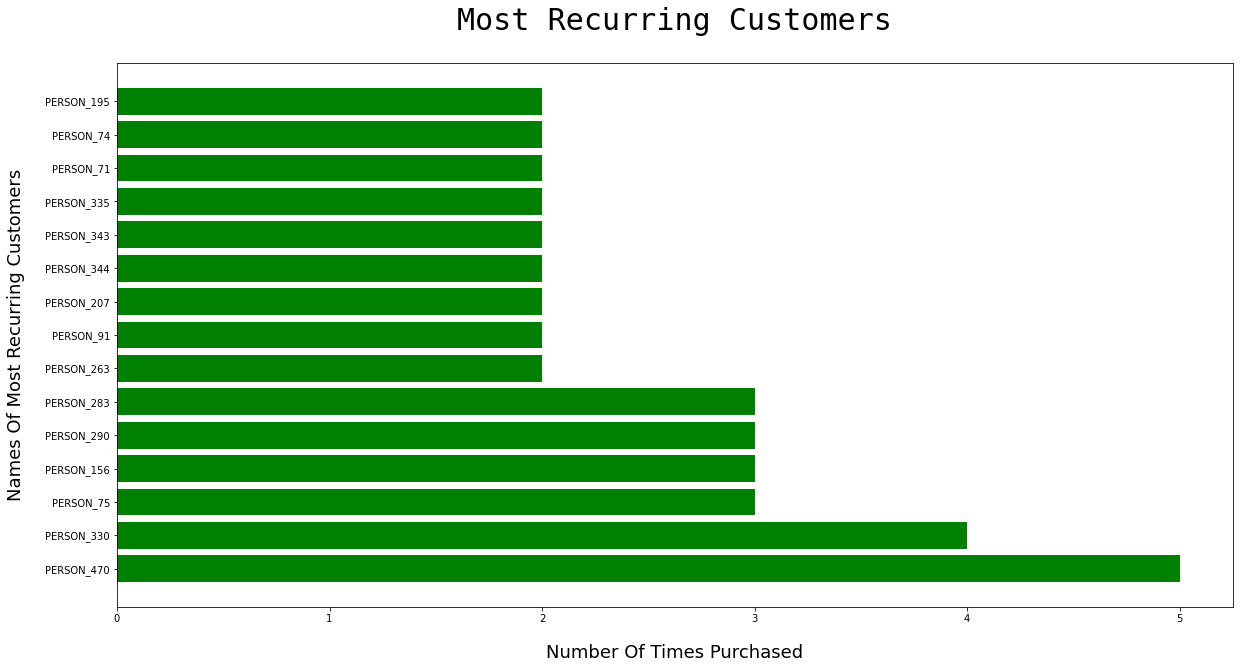

array([['PERSON_470', '5'],
       ['PERSON_330', '4'],
       ['PERSON_75', '3'],
       ['PERSON_156', '3'],
       ['PERSON_290', '3'],
       ['PERSON_283', '3'],
       ['PERSON_263', '2'],
       ['PERSON_91', '2'],
       ['PERSON_207', '2'],
       ['PERSON_344', '2'],
       ['PERSON_343', '2'],
       ['PERSON_335', '2'],
       ['PERSON_71', '2'],
       ['PERSON_74', '2'],
       ['PERSON_195', '2']], dtype='<U11')

In [15]:
# Top N Customers By Most Frequency of Occurrence

n = 15
custmost1 = Order_Details['Name'].value_counts().index.tolist()[:n]
custmost2 = Order_Details['Name'].value_counts().values.tolist()[:n]
custmost = np.column_stack((custmost1,custmost2))
print("\033[1mCustomer Name\033[0m" + '\t' + "\033[1mNumber of Times Purchased\033[0m\n")
print('\n'.join('\t\t'.join(map(str, row)) for row in custmost))


plt.figure(figsize=(20,10))
plt.title('Most Recurring Customers', fontdict={'fontname':'monospace','fontsize':30},y=1.05)
plt.ylabel("Names Of Most Recurring Customers",fontsize=18,labelpad=20)
plt.xlabel("Number Of Times Purchased",fontsize=18,labelpad=20)
plt.barh(custmost1,custmost2,color='g')
plt.show()
custmost

## 2. Which Products Were Most Sold/Purchased?

Product Name	Units Sold (Number/Quantity)

PRODUCT_75		121
PRODUCT_63		97
PRODUCT_27		76
PRODUCT_25		59
PRODUCT_12		52
PRODUCT_74		49
PRODUCT_34		44
PRODUCT_68		32
PRODUCT_57		30
PRODUCT_85		26


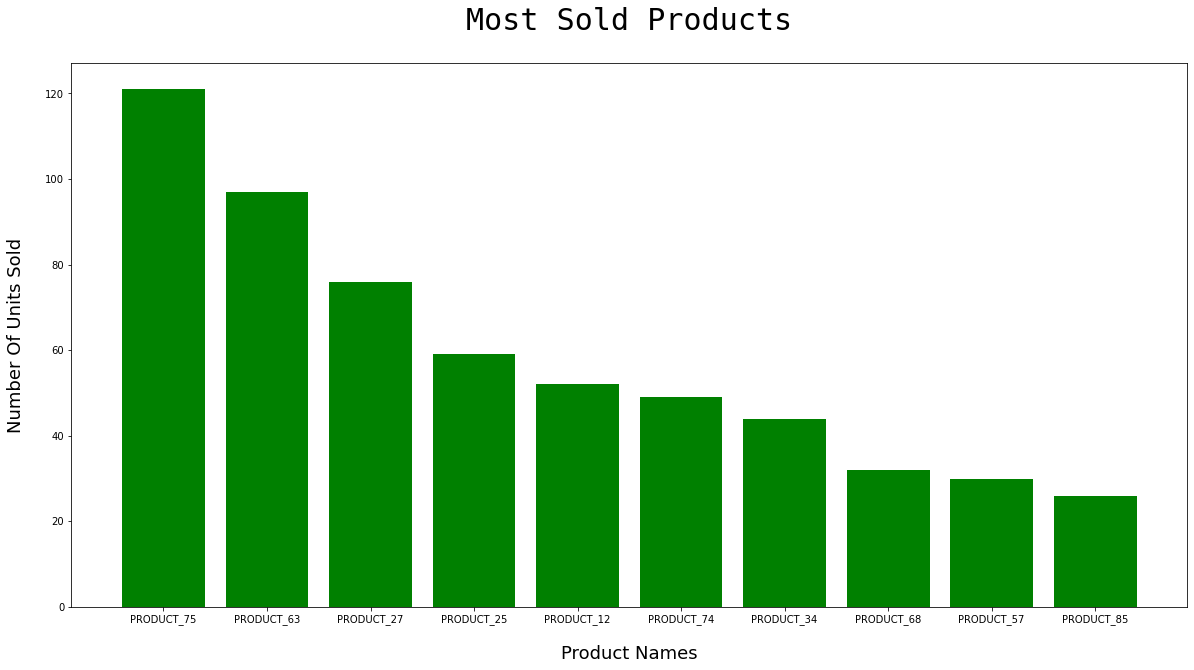

In [16]:
# Top N Products Sold By Most Frequency Of Occurence

n = 10

prodmost1 = reshaped['Product'].value_counts().index.tolist()[:n]
prodmost2 = reshaped['Product'].value_counts().values.tolist()[:n]
prodmost = np.column_stack((prodmost1,prodmost2))
print("\033[1mProduct Name\033[0m" + '\t' + "\033[1mUnits Sold (Number/Quantity)\033[0m\n")
print('\n'.join('\t\t'.join(map(str, row)) for row in prodmost))


plt.figure(figsize=(20,10))

plt.title('Most Sold Products', fontdict={'fontname':'monospace','fontsize':30}, y=1.05)
plt.ylabel("Number Of Units Sold",fontsize=18,labelpad=20)
plt.xlabel("Product Names",fontsize=18,labelpad=20)
plt.bar(prodmost1,prodmost2,color='g')

plt.show()

## 3. Analysis of Peak Times (More Engagement)

Hour Of Day	Cumulative Number of Purchases

23		51
12		51
22		45
19		42
21		41
15		41
20		39
11		37
13		33
18		33
16		29
14		28
17		27
10		24
0		17
9		14
8		10
7		6
1		4
2		3
5		3
6		2
3		1


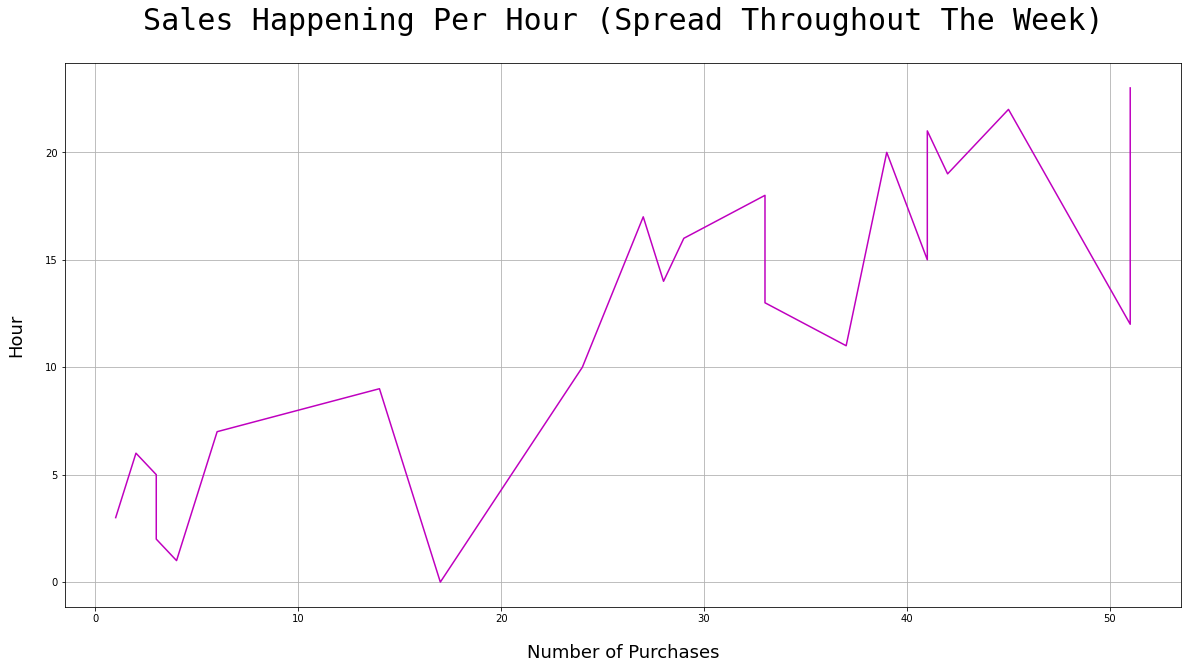

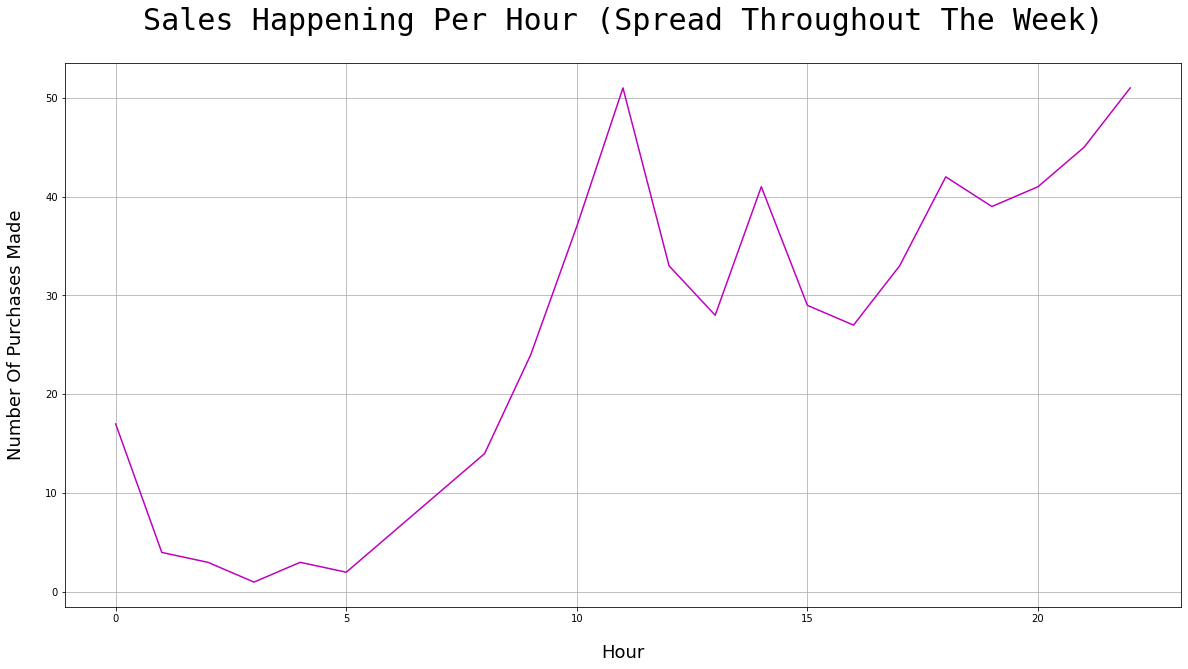

In [17]:
Order_Details['Time'] = pd.to_datetime(Order_Details['Transaction Date'])
Order_Details['Hour'] = (Order_Details['Time']).dt.hour
Order_Details['Hour'].unique()
timemost = Order_Details['Hour'].value_counts()



timemost1 = Order_Details['Hour'].value_counts().index.tolist()[:24] # n =24 in this case, can be modified as per need to see top 'n' busiest hours
timemost2 = Order_Details['Hour'].value_counts().values.tolist()[:24]
tmost = np.column_stack((timemost1,timemost2))

print("\033[1mHour Of Day\033[0m" + "\t" + "\033[1mCumulative Number of Purchases\033[0m\n")
print('\n'.join('\t\t'.join(map(str, row)) for row in tmost))



plt.figure(figsize=(20,10))
plt.title('Sales Happening Per Hour (Spread Throughout The Week)', fontdict={'fontname':'monospace','fontsize':30},y=1.05)
plt.ylabel("Hour",fontsize=18,labelpad=20)
plt.xlabel("Number of Purchases",fontsize=18,labelpad=20)
plt.plot(timemost2,timemost1,color='m')
plt.grid()
plt.show()

timemost1 = []

for i in range(0,23):
    timemost1.append(i)
    
timemost2 = timemost.sort_index()
timemost2.tolist()

timemost2 = pd.DataFrame(timemost2)







plt.figure(figsize=(20,10))
plt.title('Sales Happening Per Hour (Spread Throughout The Week)', fontdict={'fontname':'monospace','fontsize':30},y=1.05)
plt.ylabel("Number Of Purchases Made",fontsize=18,labelpad=20)
plt.xlabel("Hour",fontsize=18,labelpad=20)
plt.plot(timemost1,timemost2,color='m')
plt.grid()
plt.show()



## 4. Email Analysis (Checking Customers Who Use Company's Mail ID To Recognize Target Segment Better)

In [18]:
split_mail1 = Order_Details['Email'].str.split('@', n=1, expand=True)
split_mail2 = split_mail1[1].str.split('.', n=1, expand=True)
print(split_mail2)

Order_Details = Order_Details.join(split_mail2)
Order_Details

                0    1
0           gmail  com
1    tataprojects  com
2           gmail  com
3           gmail  com
4           gmail  com
..            ...  ...
576         gmail  com
577         gmail  com
578         gmail  com
579         gmail  com
580         gmail  com

[581 rows x 2 columns]


,Name,Email,Product,Transaction Date,Time,Hour,0,1
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26,2021-01-03 00:47:26,0,gmail,com
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07,2021-01-03 02:04:07,2,tataprojects,com
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43,2021-01-03 09:10:43,9,gmail,com
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48,2021-01-03 09:49:48,9,gmail,com
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46,2021-01-03 10:56:46,10,gmail,com
...,...,...,...,...,...,...,...,...
576,PERSON_522,PERSON_522@gmail.com,"PRODUCT_48,PRODUCT_80,PRODUCT_71,PRODUCT_68,PR...",07/03/2021 23:53:03,2021-07-03 23:53:03,23,gmail,com
577,PERSON_523,PERSON_523@gmail.com,PRODUCT_8,07/03/2021 23:55:01,2021-07-03 23:55:01,23,gmail,com
578,PERSON_523,PERSON_523@gmail.com,"PRODUCT_36,PRODUCT_14,PRODUCT_64,PRODUCT_28,PR...",07/03/2021 23:58:24,2021-07-03 23:58:24,23,gmail,com
579,PERSON_524,PERSON_524@gmail.com,"PRODUCT_75,PRODUCT_71,PRODUCT_86,PRODUCT_63,PR...",07/03/2021 23:59:26,2021-07-03 23:59:26,23,gmail,com


In [19]:
Order_Details.rename(columns={0:"USERNAME",1:"DOMAIN"})

,Name,Email,Product,Transaction Date,Time,Hour,USERNAME,DOMAIN
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26,2021-01-03 00:47:26,0,gmail,com
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07,2021-01-03 02:04:07,2,tataprojects,com
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43,2021-01-03 09:10:43,9,gmail,com
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48,2021-01-03 09:49:48,9,gmail,com
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46,2021-01-03 10:56:46,10,gmail,com
...,...,...,...,...,...,...,...,...
576,PERSON_522,PERSON_522@gmail.com,"PRODUCT_48,PRODUCT_80,PRODUCT_71,PRODUCT_68,PR...",07/03/2021 23:53:03,2021-07-03 23:53:03,23,gmail,com
577,PERSON_523,PERSON_523@gmail.com,PRODUCT_8,07/03/2021 23:55:01,2021-07-03 23:55:01,23,gmail,com
578,PERSON_523,PERSON_523@gmail.com,"PRODUCT_36,PRODUCT_14,PRODUCT_64,PRODUCT_28,PR...",07/03/2021 23:58:24,2021-07-03 23:58:24,23,gmail,com
579,PERSON_524,PERSON_524@gmail.com,"PRODUCT_75,PRODUCT_71,PRODUCT_86,PRODUCT_63,PR...",07/03/2021 23:59:26,2021-07-03 23:59:26,23,gmail,com


In [20]:
corp1 = Order_Details[(Order_Details[0].str.contains("gmail")==False) & (Order_Details[0].str.contains("yahoo")==False) & (Order_Details[0].str.contains("rediffmail")==False) & (Order_Details[0].str.contains("outlook")==False) & (Order_Details[0].str.contains("hotmail")==False) & (Order_Details[0].str.contains("yahoo")==False) & (Order_Details[0].str.contains("yahoo.in")==False) & (Order_Details[0].str.contains("live")==False) & (Order_Details[0].str.contains("GMAIL")==False)]

display(corp1) #Details Of Customers Who Use Office ID For Purchase

corp1.shape

,Name,Email,Product,Transaction Date,Time,Hour,0,1
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07,2021-01-03 02:04:07,2,tataprojects,com
23,PERSON_24,PERSON_24@kamalmotors.co.in,PRODUCT_63,01/03/2021 17:53:28,2021-01-03 17:53:28,17,kamalmotors,co.in
34,PERSON_35,PERSON_35@ntpc.co.in,PRODUCT_75,01/03/2021 22:43:37,2021-01-03 22:43:37,22,ntpc,co.in
35,PERSON_35,PERSON_35@ntpc.co.in,"PRODUCT_57,PRODUCT_90,PRODUCT_66,PRODUCT_58,PR...",01/03/2021 22:50:54,2021-01-03 22:50:54,22,ntpc,co.in
53,PERSON_52,PERSON_52@moirasariya.com,PRODUCT_83,02/03/2021 13:59:58,2021-02-03 13:59:58,13,moirasariya,com
60,PERSON_59,PERSON_59@labomed.in,PRODUCT_27,02/03/2021 17:32:45,2021-02-03 17:32:45,17,labomed,in
61,PERSON_60,PERSON_60@mcdermott.com,"PRODUCT_86,PRODUCT_72,PRODUCT_78,PRODUCT_57,PR...",02/03/2021 17:41:33,2021-02-03 17:41:33,17,mcdermott,com
65,PERSON_64,PERSON_64@sophos.com,"PRODUCT_63,PRODUCT_75",02/03/2021 19:39:35,2021-02-03 19:39:35,19,sophos,com
83,PERSON_82,PERSON_82@tatachemicals.com,"PRODUCT_24,PRODUCT_57",03/03/2021 10:46:55,2021-03-03 10:46:55,10,tatachemicals,com
84,PERSON_52,PERSON_52@moirasariya.com,"PRODUCT_66,PRODUCT_5",03/03/2021 10:48:45,2021-03-03 10:48:45,10,moirasariya,com


(38, 8)

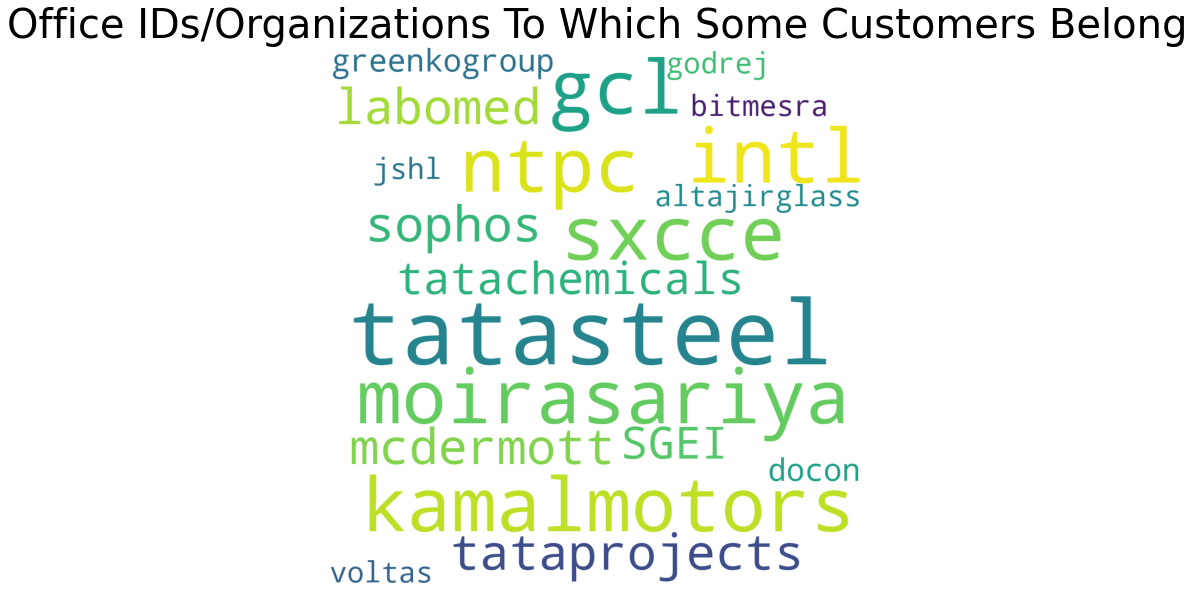

In [21]:
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 20).generate(str(corp1[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Office IDs/Organizations To Which Some Customers Belong',fontsize = 40)
plt.show()

## 5. Bulk Customers

Name Of Customer	Number Of Purchases In Single Transaction

PERSON_310		47
PERSON_522		25
PERSON_470		23
PERSON_523		21
PERSON_170		17
PERSON_521		16
PERSON_410		16
PERSON_368		15
PERSON_263		13
PERSON_8		12
PERSON_344		12
PERSON_330		12
PERSON_515		11
PERSON_423		11
PERSON_274		11
PERSON_235		11
PERSON_419		10
PERSON_330		10
PERSON_123		10


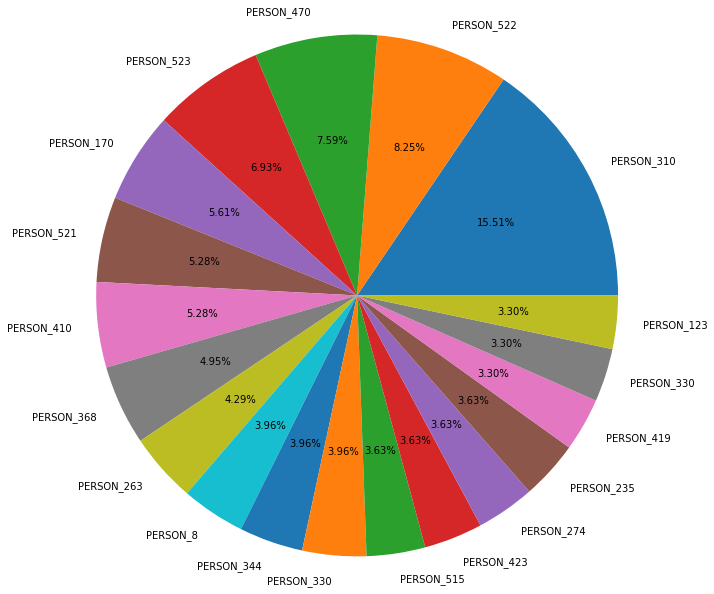

In [22]:
Order_Details['Number Of Products In A Single Transaction'] = Order_Details['Product'].str.count(",")+1
n=10

Dup_Order_Details = Order_Details


Dup_Order_Details.sort_values(["Number Of Products In A Single Transaction","Name"],axis=0, ascending=False,inplace=True,na_position='first')



Dup_Order_Details = Dup_Order_Details[Dup_Order_Details["Number Of Products In A Single Transaction"] >= 10]

Dup_Order_Details

nump = Dup_Order_Details["Number Of Products In A Single Transaction"].tolist()
namep = Dup_Order_Details["Name"].tolist()

bulkcust = np.column_stack((namep,nump))

print("\033[1mName Of Customer\033[0m" + "\t" + "\033[1mNumber Of Purchases In Single Transaction\033[0m\n")
print('\n'.join('\t\t'.join(map(str, row)) for row in bulkcust))

plt.axis("Equal")
plt.pie(nump, labels=namep,radius=3,autopct="%0.2f%%")
plt.show()

## 6. Who Among The Recurring Customers Are Also Bulk Customers?

In [23]:
reccust1 = Order_Details['Name'].value_counts().index.tolist()[:10]
reccust2 = Order_Details['Name'].value_counts().values.tolist()[:10]

recur_cust = pd.DataFrame(
    {'Name': reccust1,
     'Frequency Of Purchases': reccust2,
     
    })

common = Dup_Order_Details.merge(recur_cust,on=['Name','Name'])
common.rename({'Number Of Products In A Single Transaction':'Max No. Of Products In A Single Transaction'},axis = 1, inplace = True)

comm = common["Name"].unique()
com = pd.DataFrame(comm,columns=["Name"])



co = common.loc[com.index]

co[["Name","Email","Max No. Of Products In A Single Transaction","Frequency Of Purchases"]]

display(common)

,Name,Email,Product,Transaction Date,Time,Hour,0,1,Max No. Of Products In A Single Transaction,Frequency Of Purchases
0,PERSON_470,PERSON_470@gmail.com,"PRODUCT_3,PRODUCT_6,PRODUCT_47,PRODUCT_52,PROD...",07/03/2021 20:10:07,2021-07-03 20:10:07,20,gmail,com,23,5
1,PERSON_330,PERSON_330@gmail.com,"PRODUCT_57,PRODUCT_79,PRODUCT_24,PRODUCT_83,PR...",06/03/2021 19:37:56,2021-06-03 19:37:56,19,gmail,com,12,4
2,PERSON_330,PERSON_330@gmail.com,"PRODUCT_34,PRODUCT_30,PRODUCT_76,PRODUCT_26,PR...",06/03/2021 12:02:28,2021-06-03 12:02:28,12,gmail,com,10,4


## 7. People Purchasing In Lesser Quantities (In Single Transaction)

No. Of Distinct People Making Purchases In Lesser Quantities In Single Transaction: 426

Percentage Of People Making Minority Purchases (Single Transaction):  78.309%


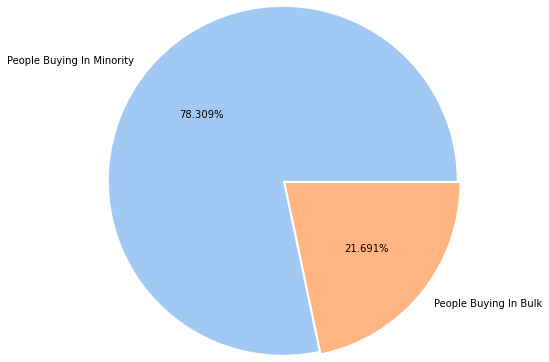

In [24]:

Dup_Order_Details2 = Order_Details
Dup_Order_Details3 = Order_Details

Dup_Order_Details2.sort_values(["Number Of Products In A Single Transaction","Name"],axis=0, ascending=False,inplace=True,na_position='first')



Dup_Order_Details2 = Dup_Order_Details2[Dup_Order_Details2["Number Of Products In A Single Transaction"] <= 2]

Dup_Order_Details3 = Dup_Order_Details3[Dup_Order_Details3["Number Of Products In A Single Transaction"] > 2]

Dup_Ord1 = Dup_Order_Details2["Name"].unique()
Dup_Ord2 = Dup_Order_Details3["Name"].unique()

print("No. Of Distinct People Making Purchases In Lesser Quantities In Single Transaction:" ,len(Dup_Ord1))
percent = "{:.3%}".format(len(Dup_Ord1)/(len(Dup_Ord2)+len(Dup_Ord1)))

print("\nPercentage Of People Making Minority Purchases (Single Transaction): ",percent)

nump = Dup_Order_Details2["Number Of Products In A Single Transaction"].tolist()
namep = Dup_Order_Details2["Name"].tolist()

percent = "{:.3}".format(len(Dup_Ord1)/(len(Dup_Ord2)+len(Dup_Ord1)))



data = [len(Dup_Ord1)/(len(Dup_Ord2)+len(Dup_Ord1))*100, (1-(len(Dup_Ord1)/(len(Dup_Ord2)+len(Dup_Ord1))))*100]
colors = sns.color_palette('pastel')
labels = ["People Buying In Minority","People Buying In Bulk"]
explode = [0.02,0.02]
plt.pie(data, labels = labels, colors = colors, radius = 2, autopct = '%0.3f%%',explode=explode)
plt.show()


In [25]:
lesscust = np.column_stack((namep,nump))


print("\n\033[1mName Of Customer\033[0m" + "\t" + "\033[1mNumber Of Purchases In Single Transaction\033[0m\n")
print('\n'.join('\t\t'.join(map(str, row)) for row in lesscust))


Name Of Customer	Number Of Purchases In Single Transaction

PERSON_98		2
PERSON_85		2
PERSON_82		2
PERSON_70		2
PERSON_67		2
PERSON_65		2
PERSON_64		2
PERSON_62		2
PERSON_55		2
PERSON_525		2
PERSON_52		2
PERSON_510		2
PERSON_51		2
PERSON_502		2
PERSON_501		2
PERSON_50		2
PERSON_496		2
PERSON_494		2
PERSON_493		2
PERSON_491		2
PERSON_486		2
PERSON_484		2
PERSON_480		2
PERSON_48		2
PERSON_477		2
PERSON_470		2
PERSON_469		2
PERSON_464		2
PERSON_463		2
PERSON_462		2
PERSON_461		2
PERSON_458		2
PERSON_457		2
PERSON_447		2
PERSON_445		2
PERSON_444		2
PERSON_436		2
PERSON_434		2
PERSON_429		2
PERSON_425		2
PERSON_421		2
PERSON_414		2
PERSON_412		2
PERSON_411		2
PERSON_409		2
PERSON_381		2
PERSON_376		2
PERSON_373		2
PERSON_361		2
PERSON_360		2
PERSON_36		2
PERSON_352		2
PERSON_350		2
PERSON_346		2
PERSON_343		2
PERSON_337		2
PERSON_335		2
PERSON_332		2
PERSON_330		2
PERSON_326		2
PERSON_317		2
PERSON_314		2
PERSON_312		2
PERSON_302		2
PERSON_299		2
PERSON_292		2
PERSON_29		2
PERSON_28		2
PER

## 8. Engagement By Days Of Week

In [26]:
Order_Details['Time'] = Order_Details['Time'].apply(lambda x: dt.datetime.strftime(x, '%Y-%d-%m %H:%M:%S'))
Order_Details['Time'] = pd.to_datetime(Order_Details['Time'])
Order_Details['Week Day'] = pd.Series(Order_Details['Time']).dt.day_name()



,Day Of Week,No. Of Engagements
0,Sunday,144
1,Wednesday,117
2,Saturday,100
3,Thursday,85
4,Friday,62
5,Monday,38
6,Tuesday,35


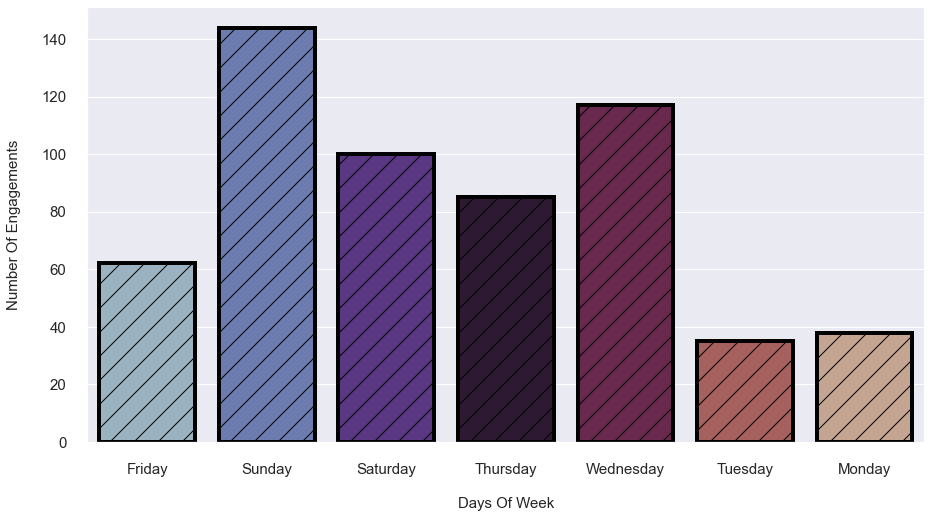

In [43]:
daymost = Order_Details['Week Day'].value_counts()

daymost1 = Order_Details['Week Day'].value_counts().index.tolist()[:] 
daymost2 = Order_Details['Week Day'].value_counts().values.tolist()[:]

daymost = pd.DataFrame({'Day Of Week':daymost1,'No. Of Engagements':daymost2})

display(daymost)

sns.set_style('darkgrid')
sns.set(rc = {'figure.figsize':(15,8)})
graph = sns.countplot(x='Week Day',data=Order_Details, palette='twilight', lw=4, ec='black',hatch='/')
graph.tick_params(axis='both', which='major', pad=15)
plt.yticks(size=15)
plt.xticks(size=15)
graph.set_xlabel('Days Of Week',size=15,labelpad=20)
graph.set_ylabel('Number Of Engagements', size=15,labelpad=20)


plt.show()





## 9. Least Sold Products

Product Name	Units Sold (Number/Quantity)

PRODUCT_17		1
PRODUCT_45		1
PRODUCT_82		1
PRODUCT_73		1
PRODUCT_93		1
PRODUCT_13		1
PRODUCT_67		1
PRODUCT_44		2
PRODUCT_29		2
PRODUCT_50		2
PRODUCT_56		2
PRODUCT_22		2
PRODUCT_1		2
PRODUCT_46		2
PRODUCT_59		2
PRODUCT_15		2
PRODUCT_91		2
PRODUCT_21		2
PRODUCT_39		2
PRODUCT_20		2
PRODUCT_53		3
PRODUCT_35		3
PRODUCT_10		3
PRODUCT_19		3
PRODUCT_47		4

Percentage Of Products Sold Less Than 5 Times:  33.684%


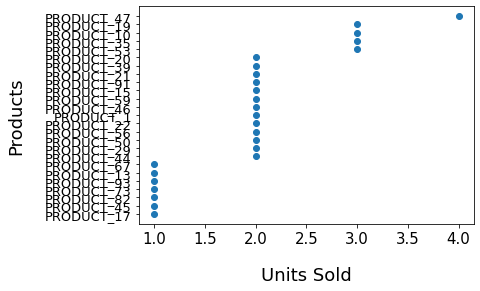

In [28]:
n = 25

prodleast1 = reshaped['Product'].value_counts(ascending=True).index.tolist()[:n]
prodleast2 = reshaped['Product'].value_counts(ascending=True).values.tolist()[:n]
prodleast = np.column_stack((prodleast1,prodleast2))
print("\033[1mProduct Name\033[0m" + '\t' + "\033[1mUnits Sold (Number/Quantity)\033[0m\n")
print('\n'.join('\t\t'.join(map(str, row)) for row in prodleast))

prodleast3 =  reshaped['Product'].value_counts(ascending=True).values.tolist()

total_count = 0
count_least = 0

for element in prodleast3:
    if element < 5:
        count_least+=1
    total_count+=1
    
percentage_of_least = "{:.3%}".format(count_least/total_count)

print("\nPercentage Of Products Sold Less Than 5 Times: ",percentage_of_least)

plt.scatter(prodleast2, prodleast1)
plt.xlabel("Units Sold", fontsize=18,labelpad=20)
plt.ylabel("Products", fontsize=18,labelpad=20)
plt.yticks(size=13)
plt.xticks(size=15)
plt.show()

## 10. Top 'N' Selling Products On An Hour-On-Hour Basis

In [29]:
reshaped['Time'] = pd.to_datetime(reshaped['Transaction Date'])
reshaped['Hour'] = (reshaped['Time']).dt.hour


results = reshaped.groupby(by=['Product', 'Hour']).count()


res = reshaped.groupby(['Product', 'Hour']).size()

reshaped['Count of Hourly Purchases']= reshaped.groupby(['Product', 'Hour'])['Product'].transform('count')
reshaped2 = reshaped.filter(['Product','Hour','Count of Hourly Purchases'])
n=2
reshaped2 = reshaped2.sort_values('Count of Hourly Purchases', ascending=False).drop_duplicates(['Product','Hour'])

resh = pd.DataFrame()
resh_dup1 = pd.DataFrame()
resh_dup2 = pd.DataFrame()
for i in range(0,24):
    res = reshaped2[(reshaped2['Hour']==i)].iloc[0:n]
    res_dup1 = reshaped2[(reshaped2['Hour']==i)].iloc[0:1]
    res_dup2 = reshaped2[(reshaped2['Hour']==i)].iloc[1:2]
    resh = resh.append(res)
    resh_dup1 = resh_dup1.append(res_dup1)
    resh_dup2 = resh_dup2.append(res_dup2)

display(resh)


x = resh_dup1['Hour'].to_numpy()
y1 = resh_dup1['Count of Hourly Purchases'].to_numpy()
y2 = resh_dup2['Count of Hourly Purchases'].to_numpy()

l1 = resh_dup1['Product'].tolist()
l2 = resh_dup2['Product'].tolist()


    
    






,Product,Hour,Count of Hourly Purchases
892,PRODUCT_33,0,4
914,PRODUCT_85,0,3
68,PRODUCT_25,1,2
937,PRODUCT_2,1,1
124,PRODUCT_24,2,1
69,PRODUCT_34,2,1
125,PRODUCT_33,3,1
126,PRODUCT_27,3,1
481,PRODUCT_32,5,1
482,PRODUCT_63,5,1


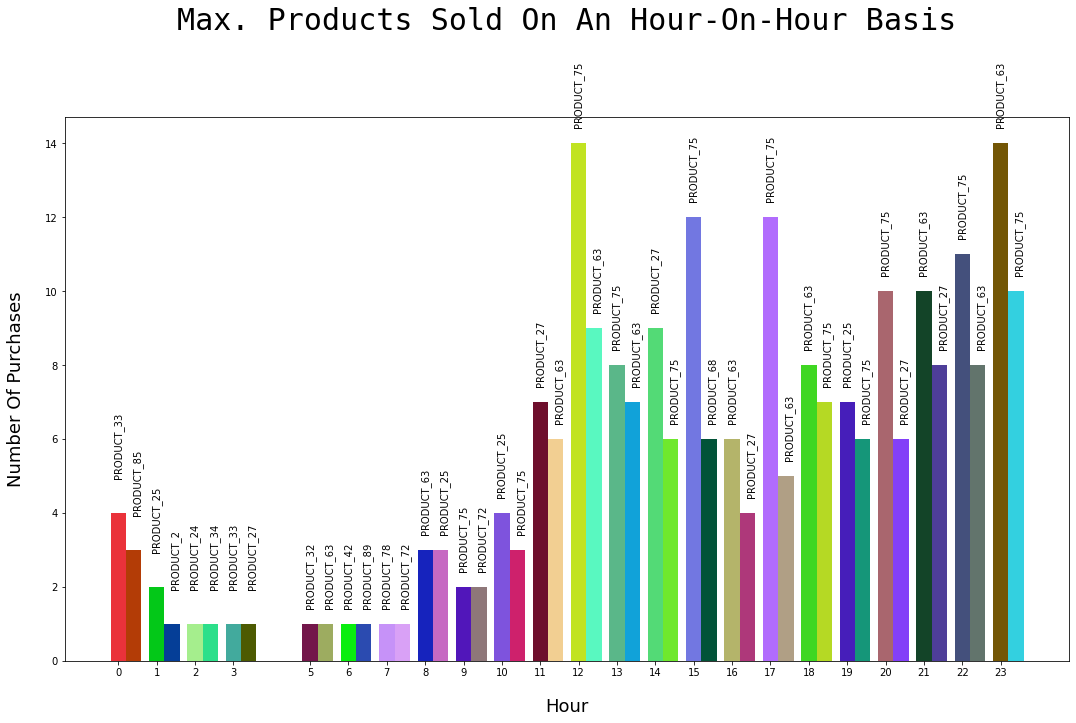

In [30]:
width=0.4
colors1 = []
colors2 = []

for i in range(23):
    colors1.append('#%06X' % randint(0, 0xFFFFFF))
    
number_of_colors = 24

colors2 = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
                   
plt.figure(figsize=(18,10))



for i in range(0,len(l1)):
    
    if(i<=3):
        plt.text(i,y1[i]+1,l1[i], ha='center',rotation='vertical')
        plt.text(i+0.5,y2[i]+1,l2[i], ha='center',rotation='vertical')
    elif(i>=5 and i <23):
        plt.text(i,y1[i-1]+0.5,l1[i-1], ha='center',rotation='vertical')
        plt.text(i+0.5,y2[i-1]+0.5,l2[i-1], ha='center',rotation='vertical')
    
plt.text(23,y1[22]+0.5,l1[22], ha='center',rotation='vertical')
plt.text(23+0.5,y2[22]+0.5,l2[22], ha='center',rotation='vertical')
    
plt.bar(x,y1,width,color=colors1)
plt.bar(x+width,y2,width,color=colors2)

plt.title('Max. Products Sold On An Hour-On-Hour Basis', fontdict={'fontname':'monospace','fontsize':30},y=1.15)
plt.ylabel("Number Of Purchases",fontsize=18,labelpad=20)
plt.xlabel("Hour",fontsize=18,labelpad=20)
plt.xticks(x, x, rotation ='horizontal')
plt.show()

## 11. Top 'N' Selling Products On Weekday Basis:

In [31]:
reshaped['Time'] = reshaped['Time'].apply(lambda x: dt.datetime.strftime(x, '%Y-%d-%m %H:%M:%S'))

reshaped['Time'] = pd.to_datetime(reshaped['Time'])
reshaped['Week Day'] = pd.Series(reshaped['Time']).dt.day_name()
reshaped['Count of Weekday Purchases']= reshaped.groupby(['Product', 'Week Day'])['Product'].transform('count')

reshaped3 = reshaped.filter(['Product','Week Day','Count of Weekday Purchases'])

n=2

reshaped3 = reshaped3.sort_values('Count of Weekday Purchases', ascending=False).drop_duplicates(['Product','Week Day'])
resh2 = pd.DataFrame()
resh2_dup1 = pd.DataFrame()
resh2_dup2 = pd.DataFrame()

weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

for days in weekdays:
    res2 = reshaped3[(reshaped3['Week Day']==days)].iloc[0:n]
    resh2 = resh2.append(res2)
    
display(resh2)


,Product,Week Day,Count of Weekday Purchases
44,PRODUCT_63,Monday,13
1,PRODUCT_75,Monday,10
80,PRODUCT_75,Tuesday,10
121,PRODUCT_27,Tuesday,7
301,PRODUCT_63,Wednesday,29
207,PRODUCT_75,Wednesday,29
468,PRODUCT_75,Thursday,24
325,PRODUCT_63,Thursday,14
634,PRODUCT_75,Friday,10
530,PRODUCT_34,Friday,8


## 12. Top 'N' Customers Based On Weekday Basis

In [32]:
Order_Details['Count of Weekday Purchases (For Customers)']= reshaped.groupby(['Name', 'Week Day'])['Name'].transform('count')
Order_Det = Order_Details.filter(['Name','Week Day','Count of Weekday Purchases (For Customers)'])
Order_Det = Order_Det.sort_values('Count of Weekday Purchases (For Customers)', ascending=False).drop_duplicates(['Name','Week Day'])

resh2 = pd.DataFrame()
resh2_dup1 = pd.DataFrame()
resh2_dup2 = pd.DataFrame()

weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

for days in weekdays:
    res2 = Order_Det[(Order_Det['Week Day']==days)].iloc[0:n]
    resh2 = resh2.append(res2)
    
display(resh2)

,Name,Week Day,Count of Weekday Purchases (For Customers)
5,PERSON_6,Monday,4
7,PERSON_8,Monday,4
56,PERSON_55,Tuesday,7
54,PERSON_53,Tuesday,7
106,PERSON_103,Wednesday,6
109,PERSON_106,Wednesday,6
216,PERSON_207,Thursday,10
209,PERSON_200,Thursday,10
312,PERSON_297,Friday,5
313,PERSON_298,Friday,5


## 13. Top Customers Based On Hourly Basis

,Name,Hour,Count of Hourly Purchases (For Customers)
438,PERSON_263,0,2
40,PERSON_40,1,1
41,PERSON_41,2,1
75,PERSON_74,3,1
278,PERSON_265,5,1
191,PERSON_183,6,1
449,PERSON_414,7,2
341,PERSON_318,8,1
346,PERSON_323,9,1
45,PERSON_45,10,2


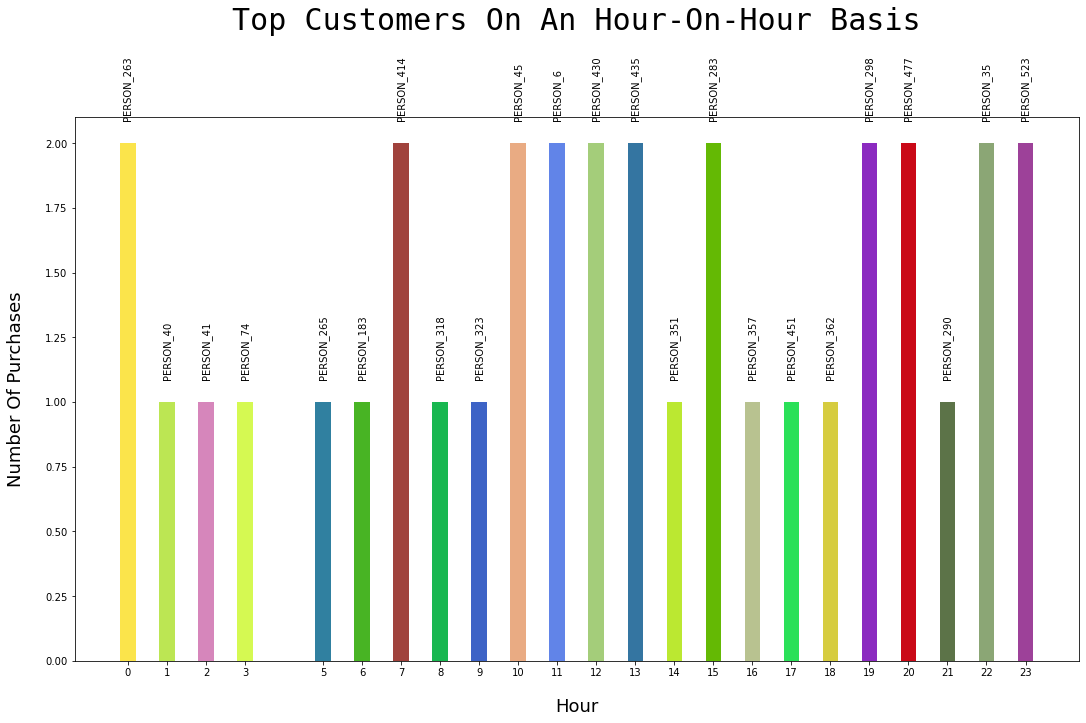

In [33]:
Order_Details['Count of Hourly Purchases (For Customers)']= Order_Details.groupby(['Name', 'Hour'])['Name'].transform('count')
Order_Det2 = Order_Details.filter(['Name','Hour','Count of Hourly Purchases (For Customers)'])
n=1
Order_Det2 = Order_Det2.sort_values('Count of Hourly Purchases (For Customers)', ascending=False).drop_duplicates(['Name','Hour'])

resh = pd.DataFrame()
resh_dup1 = pd.DataFrame()
resh_dup2 = pd.DataFrame()
for i in range(0,24):
    res = Order_Det2[(Order_Det2['Hour']==i)].iloc[0:n]
    resh = resh.append(res)
    
display(resh)

x = resh['Hour'].to_numpy()
y = resh['Count of Hourly Purchases (For Customers)'].to_numpy()

l1 = resh['Name'].tolist()



width=0.4
colors1 = []
colors2 = []

for i in range(23):
    colors1.append('#%06X' % randint(0, 0xFFFFFF))
    
number_of_colors = 24

colors2 = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
                   
plt.figure(figsize=(18,10))



for i in range(0,len(l1)):
    
    if(i<=3):
        plt.text(i,y[i]+0.10,l1[i], ha='center',rotation='vertical')
        
    elif(i>=5 and i <23):
        plt.text(i,y[i-1]+0.10,l1[i-1], ha='center',rotation='vertical')
       
    
plt.text(23,y[22]+0.10,l1[22], ha='center',rotation='vertical')

    
plt.bar(x,y,width,color=colors1)


plt.title('Top Customers On An Hour-On-Hour Basis', fontdict={'fontname':'monospace','fontsize':30},y=1.15)
plt.ylabel("Number Of Purchases",fontsize=18,labelpad=20)
plt.xlabel("Hour",fontsize=18,labelpad=20)
plt.xticks(x, x, rotation ='horizontal')
plt.show()

    
    








## 14. Dominant/Supplement Product Pair

In [34]:
orde = Order_Details['Product'].str.split(',', expand=True)
orde = orde.sort_index()

arr1 = orde.to_numpy()

arr2 = []
arr3 = []

for i in range (0,581):
    for j in range(0,47):
        if(arr1[i][j]!=None):
            arr2.append(arr1[i][j])
    arr3.append(arr2)
    arr2 = []
    

            

In [35]:
def frequency_items (x,y):
    fx_=sum([x in i for i in arr3])
    fy_=sum([y in i for i in arr3])
    
    fxy_=sum([all(z in i for z in [x,y]) for i in arr3])
    
    support=fxy_/len(arr3)
    confidence = support/(fx_/len(arr3))
    lift =confidence /(fy_/len(arr3))
    if confidence ==1:
        conviction = 0
    else:
        conviction=(1-(fy_/len(arr3)))/(1-confidence)
    
    print("Support = {}".format(round(support,2)))
    print("Confidence = {}".format(round(confidence,2)))
    print("Lift= {}".format(round(lift,2)))
    print("Conviction={}".format(round(conviction,2)))

In [36]:
frequency_items('PRODUCT_27','PRODUCT_63')

Support = 0.05
Confidence = 0.37
Lift= 2.21
Conviction=1.32


## 15. Market Basket Analysis

In [37]:
import mlxtend.frequent_patterns 
import mlxtend.preprocessing

encode_=mlxtend.preprocessing.TransactionEncoder()
encode_arr=encode_.fit_transform(arr3)

print(encode_arr)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [38]:
encode_df=pd.DataFrame(encode_arr, columns=encode_.columns_)
encode_df

,PRODUCT_1,PRODUCT_10,PRODUCT_11,PRODUCT_12,PRODUCT_13,PRODUCT_14,PRODUCT_15,PRODUCT_16,PRODUCT_17,PRODUCT_18,...,PRODUCT_87,PRODUCT_88,PRODUCT_89,PRODUCT_9,PRODUCT_90,PRODUCT_91,PRODUCT_92,PRODUCT_93,PRODUCT_94,PRODUCT_95
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
577,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
578,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
579,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
md=mlxtend.frequent_patterns.apriori(encode_df)
md_minsup=mlxtend.frequent_patterns.apriori(encode_df,
                                           min_support=0.01, 
                                            use_colnames=True)
md_minsup.head(20)

,support,itemsets
0,0.013769,(PRODUCT_11)
1,0.087780,(PRODUCT_12)
2,0.010327,(PRODUCT_14)
3,0.020654,(PRODUCT_2)
4,0.039587,(PRODUCT_24)
5,0.101549,(PRODUCT_25)
6,0.029260,(PRODUCT_26)
7,0.130809,(PRODUCT_27)
8,0.025818,(PRODUCT_28)
9,0.012048,(PRODUCT_3)


In [40]:
rules=mlxtend.frequent_patterns.association_rules(
md_minsup, metric="confidence",min_threshold=0.06,support_only=False)

rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PRODUCT_28),(PRODUCT_12),0.025818,0.087780,0.020654,0.800000,9.113725,0.018388,4.561102
1,(PRODUCT_12),(PRODUCT_28),0.087780,0.025818,0.020654,0.235294,9.113725,0.018388,1.273931
2,(PRODUCT_43),(PRODUCT_12),0.024096,0.087780,0.020654,0.857143,9.764706,0.018539,6.385542
3,(PRODUCT_12),(PRODUCT_43),0.087780,0.024096,0.020654,0.235294,9.764706,0.018539,1.276182
4,(PRODUCT_49),(PRODUCT_12),0.024096,0.087780,0.020654,0.857143,9.764706,0.018539,6.385542
5,(PRODUCT_12),(PRODUCT_49),0.087780,0.024096,0.020654,0.235294,9.764706,0.018539,1.276182
6,(PRODUCT_12),(PRODUCT_55),0.087780,0.027539,0.024096,0.274510,9.968137,0.021679,1.340420
7,(PRODUCT_55),(PRODUCT_12),0.027539,0.087780,0.024096,0.875000,9.968137,0.021679,7.297762
8,(PRODUCT_12),(PRODUCT_61),0.087780,0.037866,0.022375,0.254902,6.731729,0.019051,1.291285
9,(PRODUCT_61),(PRODUCT_12),0.037866,0.087780,0.022375,0.590909,6.731729,0.019051,2.229872


In [41]:
rules2=mlxtend.frequent_patterns.association_rules(
md_minsup, metric="lift",min_threshold=0.06,support_only=False)

rules2.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PRODUCT_28),(PRODUCT_12),0.025818,0.087780,0.020654,0.800000,9.113725,0.018388,4.561102
1,(PRODUCT_12),(PRODUCT_28),0.087780,0.025818,0.020654,0.235294,9.113725,0.018388,1.273931
2,(PRODUCT_43),(PRODUCT_12),0.024096,0.087780,0.020654,0.857143,9.764706,0.018539,6.385542
3,(PRODUCT_12),(PRODUCT_43),0.087780,0.024096,0.020654,0.235294,9.764706,0.018539,1.276182
4,(PRODUCT_49),(PRODUCT_12),0.024096,0.087780,0.020654,0.857143,9.764706,0.018539,6.385542
5,(PRODUCT_12),(PRODUCT_49),0.087780,0.024096,0.020654,0.235294,9.764706,0.018539,1.276182
6,(PRODUCT_12),(PRODUCT_55),0.087780,0.027539,0.024096,0.274510,9.968137,0.021679,1.340420
7,(PRODUCT_55),(PRODUCT_12),0.027539,0.087780,0.024096,0.875000,9.968137,0.021679,7.297762
8,(PRODUCT_12),(PRODUCT_61),0.087780,0.037866,0.022375,0.254902,6.731729,0.019051,1.291285
9,(PRODUCT_61),(PRODUCT_12),0.037866,0.087780,0.022375,0.590909,6.731729,0.019051,2.229872


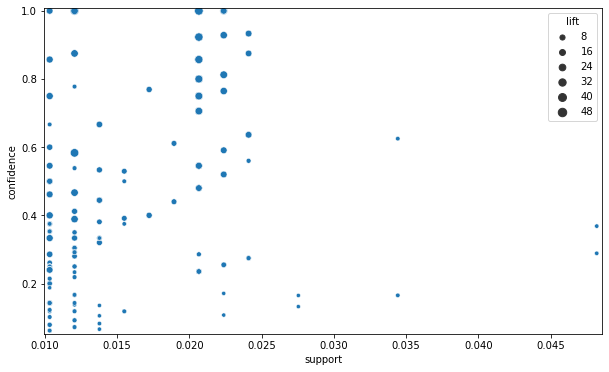

In [42]:
import networkx as nx


# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.margins(0.01,0.01)
plt.show()